# Objective

New York City Taxi and Limousine Fare - Predicting your fare for the next ride with respect to parameters like Trip Distance, pick up, Drop off time, etc.

New York City Taxi and Limousine Commission (TLC) is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles.

The TLC data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day.



Column name	             and 						Description
1.   ID:														Trip identification number
2.   VendorID:											A code indicating the TPEP provider that provided the record. 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
3. tpep_pickup_datetime:							The date and time when the meter was engaged.
4. tpep_dropoff_datetime:							The date and time when the meter was disengaged.
5. Passenger_count:	The number of passengers in the vehicle. This is a driver-entered value.
6. Trip_distance	:									The elapsed trip distance in miles reported by the taximeter.
7. PULocationID	:									TLC Taxi Zone in which the taximeter was engaged
8. DOLocationID	:									TLC Taxi Zone in which the taximeter was disengaged
9. RateCodeID	:										The final rate code in effect at the end of the trip. 1= Standard rate 2=JFK 3=Newark 4=Nassau or Westchester 5=Negotiated fare 6=Group ride
10. Store_and_fwd_flag: This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. Y= store and forward trip N= not a store and forward trip
11. Payment_type	:									A numeric code signifying how the passenger paid for the trip. 1= Credit card 2= Cash 3= No charge 4= Dispute 5= Unknown 6= Voided trip
12. Fare_amount : 										The time-and-distance fare calculated by the meter.
13. Extra	:												Miscellaneous extras and surcharges. Currently, this only includes the USD 0.50 and USD 1 rush hour and overnight charges.
14. MTA_tax	:											USD 0.50 MTA tax that is automatically triggered based on the metered rate in use.
15. Improvement_surcharge	:					USD 0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
16. Tip_amount :										This field is automatically populated for credit card tips. Cash tips are not included.
17. Tolls_amount : 										Total amount of all tolls paid in trip.
18. Total_amount	:									The total amount charged to passengers. Does not include cash tips.





# Import Libraries & Data Overview

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
import statsmodels.api as sm
# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Trip_Data.csv to Trip_Data.csv


In [4]:
df = pd.read_csv("Trip_Data.csv")

In [5]:
df.shape

(22699, 18)

In [6]:
data = df.copy()

In [7]:
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [9]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

In [10]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

Unnamed: 0               0.0
VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
dtype: float64

In [11]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,22699.0,5.675849e+07,3.274493e+07,12127.0,28520556.00,56731504.00,85374524.00,1.134863e+08
VendorID,22699.0,1.556236e+00,4.968384e-01,1.0,1.00,2.00,2.00,2.000000e+00
passenger_count,22699.0,1.642319e+00,1.285231e+00,0.0,1.00,1.00,2.00,6.000000e+00
trip_distance,22699.0,2.913313e+00,3.653171e+00,0.0,0.99,1.61,3.06,3.396000e+01
RatecodeID,22699.0,1.043394e+00,7.083909e-01,1.0,1.00,1.00,1.00,9.900000e+01
PULocationID,22699.0,1.624124e+02,6.663337e+01,1.0,114.00,162.00,233.00,2.650000e+02
DOLocationID,22699.0,1.615280e+02,7.013969e+01,1.0,112.00,162.00,233.00,2.650000e+02
payment_type,22699.0,1.336887e+00,4.962111e-01,1.0,1.00,1.00,2.00,4.000000e+00
fare_amount,22699.0,1.302663e+01,1.324379e+01,-120.0,6.50,9.50,14.50,9.999900e+02
extra,22699.0,3.332746e-01,4.630966e-01,-1.0,0.00,0.00,0.50,4.500000e+00


# Exploratory Data Analysis

In [12]:
# Convert columns to datetime objects
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Calculate duration in minutes
data['duration_mins'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60

In [13]:
data

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_mins
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,3.266667
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,40.800000
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,4.133333
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,11.933333


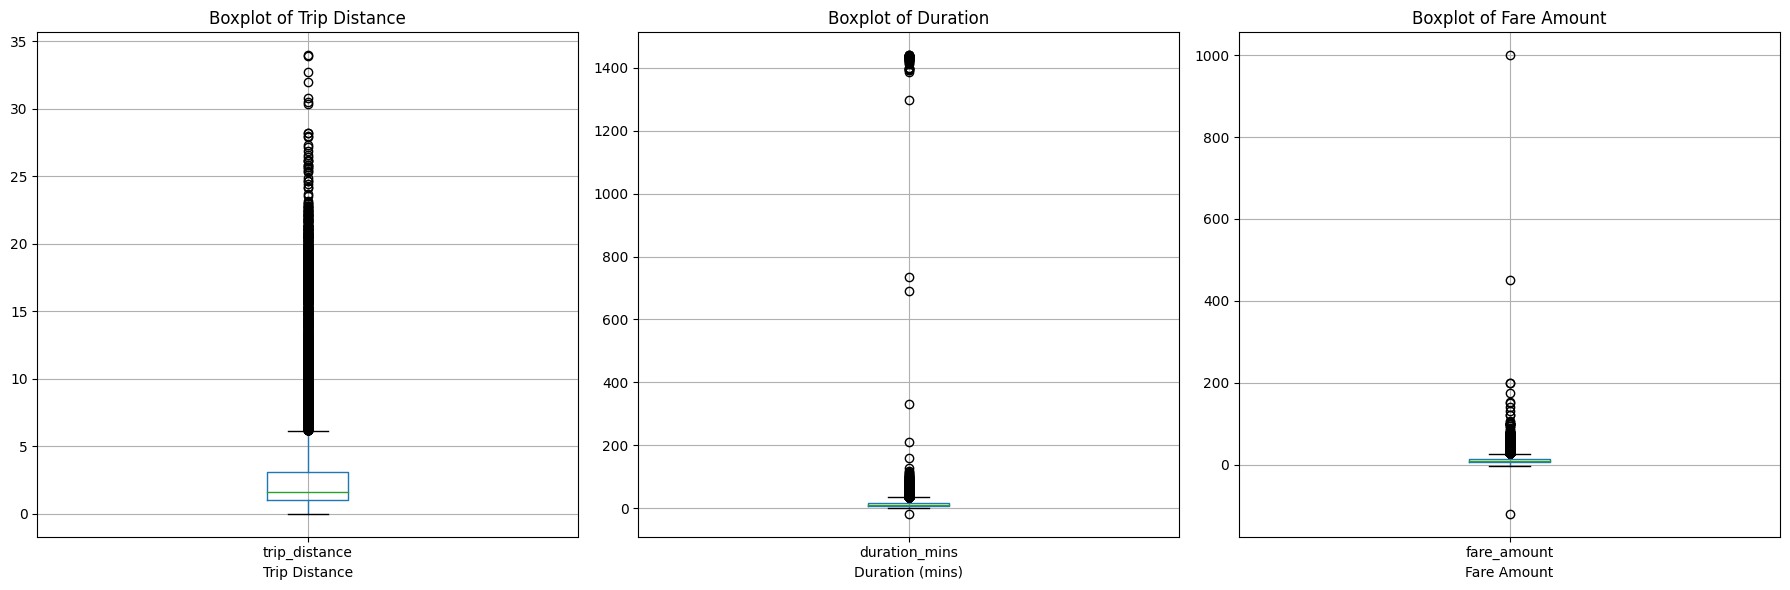

In [14]:
# Creating subplots for each boxplot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Boxplot for trip distance
data.boxplot(column='trip_distance', ax=axes[0])
axes[0].set_title('Boxplot of Trip Distance')
axes[0].set_xlabel('Trip Distance')

# Boxplot for duration
data.boxplot(column='duration_mins', ax=axes[1])
axes[1].set_title('Boxplot of Duration')
axes[1].set_xlabel('Duration (mins)')

# Boxplot for fare amount
data.boxplot(column='fare_amount', ax=axes[2])
axes[2].set_title('Boxplot of Fare Amount')
axes[2].set_xlabel('Fare Amount')

plt.tight_layout()
plt.show()


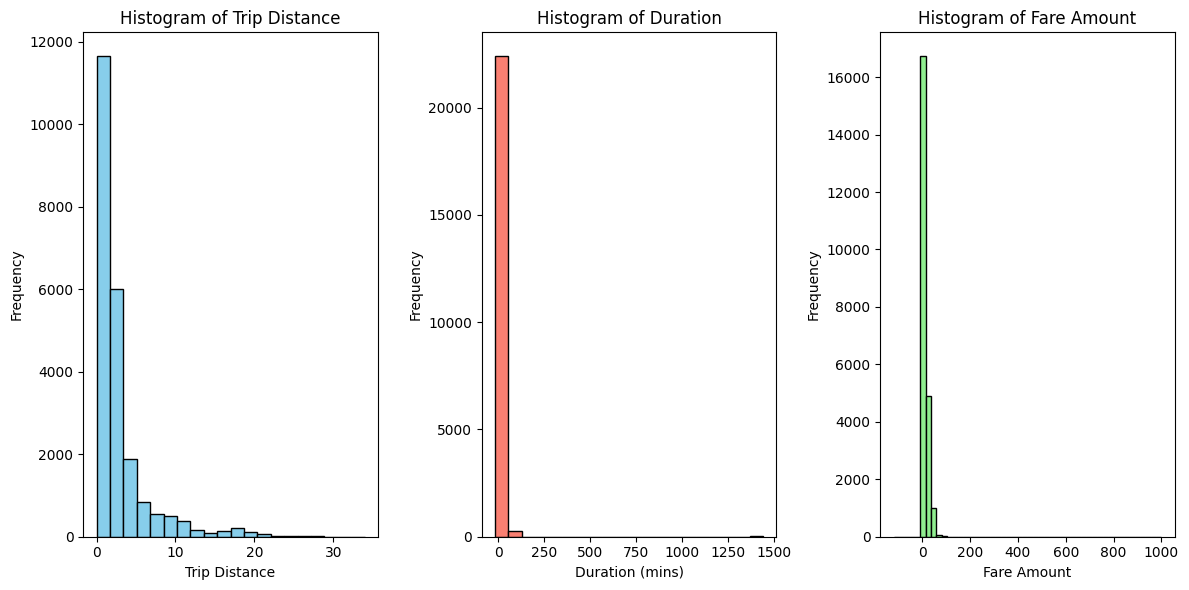

In [15]:
# Creating subplots for each histogram
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

# Histogram for trip distance
axes[0].hist(data['trip_distance'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Trip Distance')
axes[0].set_xlabel('Trip Distance')
axes[0].set_ylabel('Frequency')

# Histogram for duration
axes[1].hist(data['duration_mins'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Histogram of Duration')
axes[1].set_xlabel('Duration (mins)')
axes[1].set_ylabel('Frequency')

# Histogram for fare amount
axes[2].hist(data['fare_amount'], bins=50, color='lightgreen', edgecolor='black')
axes[2].set_title('Histogram of Fare Amount')
axes[2].set_xlabel('Fare Amount')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Outlier imputation - 'fare_amount'

The box plot and histogram shows a lot of outliers for the duration and fare amount. Checking the extremes and dropping the outliers

In [16]:
data['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

The negative values in fare_amount seems odd and irrelevant. Imputing the negative values with zero. The maximum amount is also pretty high. Since 75% of the values lies below $15 we can check the IQR and impute for higher values.

In [17]:
# Sort the DataFrame in descending order by 'fare_amount'
sorted_data = data.sort_values(by='fare_amount', ascending=False)

# Display the sorted DataFrame
sorted_data.head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_mins
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29,0.966667
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30,0.150000
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,60.150000
15474,55538852,2,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80,0.083333
12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74,0.300000
3582,111653084,1,2017-01-01 23:53:01,2017-01-01 23:53:42,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30,0.683333
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30,39.216667
16379,101198443,2,2017-11-30 10:41:11,2017-11-30 11:31:45,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06,50.566667
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80,37.900000
11269,51920669,1,2017-06-19 00:51:17,2017-06-19 00:52:12,2,0.00,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82,0.916667


In [18]:
# Replace negative fare amounts with zero
data['fare_amount'] = data['fare_amount'].apply(lambda x: max(0, x))

# Calculate Q3 and IQR
Q3 = data['fare_amount'].quantile(0.75)
Q1 = data['fare_amount'].quantile(0.25)
IQR = Q3 - Q1

# Calculate the upper bound
upper_bound = Q3 + 1.5 * IQR

print("Upper Bound (Q3 + 1.5 * IQR):", upper_bound)


Upper Bound (Q3 + 1.5 * IQR): 26.5


The IQR shows USD26.5, but the sorted data based on fare_amount shows lot of values above USD26.5 so we change the formula for upper bound that is near $100 amount as seen from the data. So the revised upper bound formula becomes

Q3 + 10*IQR which gives the amount as USD 94.5

In [19]:
# Calculate Q3 and IQR
Q3 = data['fare_amount'].quantile(0.75)
Q1 = data['fare_amount'].quantile(0.25)
IQR = Q3 - Q1

# Create a new upper bound (Q3 + 10 * IQR)
new_upper_bound = Q3 + (10 * IQR)

# Impute values above Q3 with the new upper bound value
data.loc[data['fare_amount'] > new_upper_bound, 'fare_amount'] = new_upper_bound

# Display the updated DataFrame
data

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_mins
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,3.266667
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,40.800000
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,4.133333
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,11.933333


In [20]:
data['fare_amount'].describe()

count    22699.000000
mean        12.952023
std         10.852059
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         94.500000
Name: fare_amount, dtype: float64

## Outlier imputation - 'trip_distance'

In [21]:
data['trip_distance'].describe()

count    22699.000000
mean         2.913313
std          3.653171
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         33.960000
Name: trip_distance, dtype: float64

The trip distance has minimum values of 0 and maximum distance of 33 miles. We can leave it as it is since 25% of the value lies below a mile. Imputing would not make much difference.

## Outlier imputation - 'duration_mins'

In [22]:
data['duration_mins'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration_mins, dtype: float64

Trip duration also has negative values which needs to be processed. The 25th & 50th percentile is around 6.65 mins and 11 mins so shorter duration rides are a lot in common. The maximum value is extreme and may affect the model. Those values needs to be imputed as well.

In [23]:
# Sort the DataFrame in descending order by 'fare_amount'
sorted_data = data.sort_values(by='duration_mins', ascending=False)

# Display the sorted DataFrame
sorted_data.head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_mins
924,9397494,2,2017-02-09 23:24:58,2017-02-10 23:24:31,5,4.86,1,N,249,238,1,17.5,0.5,0.5,0.00,0.00,0.3,18.80,1439.550000
15579,41838754,2,2017-05-10 18:53:53,2017-05-11 18:53:02,5,0.74,1,N,161,162,2,7.0,1.0,0.5,0.00,0.00,0.3,8.80,1439.150000
14998,64882047,2,2017-07-31 14:04:25,2017-08-01 14:03:16,5,0.95,1,N,162,161,1,8.0,0.0,0.5,1.76,0.00,0.3,10.56,1438.850000
22638,27567057,2,2017-04-03 21:02:49,2017-04-04 21:01:28,1,1.73,1,N,107,249,2,9.0,0.5,0.5,0.00,0.00,0.3,10.30,1438.650000
15163,30152527,2,2017-04-13 23:41:09,2017-04-14 23:39:42,2,1.99,1,N,239,166,2,7.0,0.5,0.5,0.00,0.00,0.3,8.30,1438.550000
7939,55106408,2,2017-06-30 20:36:00,2017-07-01 20:34:28,1,1.09,1,N,48,161,2,7.0,0.5,0.5,0.00,0.00,0.3,8.30,1438.466667
21366,106024452,2,2017-12-14 17:21:37,2017-12-15 17:19:53,1,3.13,1,N,236,186,2,29.5,1.0,0.5,0.00,0.00,0.3,31.30,1438.266667
6751,50245266,2,2017-06-14 11:51:18,2017-06-15 11:49:20,5,2.93,1,N,107,141,2,18.5,0.0,0.5,0.00,0.00,0.3,19.30,1438.033333
6493,54862162,2,2017-06-27 16:52:07,2017-06-28 16:49:57,1,15.60,2,N,163,132,1,52.0,4.5,0.5,0.00,0.00,0.3,57.30,1437.833333
18650,83629358,2,2017-10-05 10:51:03,2017-10-06 10:48:01,1,4.70,1,N,211,142,2,23.5,0.0,0.5,0.00,0.00,0.3,24.30,1436.966667


As we can see there are a lot of values in the rane of 1400 and apart from the rest go on below 150 mins. So we need to impute with the IQR here too.

In [24]:
# Replace negative duration with zero
data['duration_mins'] = data['duration_mins'].apply(lambda x: max(0, x))

# Calculate Q3 and IQR
Q3 = data['duration_mins'].quantile(0.75)
Q1 = data['duration_mins'].quantile(0.25)
IQR = Q3 - Q1

# Calculate the upper bound
upper_bound = Q3 + 1.5 * IQR

print("Upper Bound (Q3 + 1.5 * IQR):", upper_bound)

Upper Bound (Q3 + 1.5 * IQR): 35.983333333333334


The IQR shows 36 mins, but the sorted data based on duration shows lot of values above 36 mins so we change the formula for upper bound that is near 120 mins as seen from the data. So the revised upper bound formula becomes

Q3 + 7*IQR which calculated to 100 mins.

In [25]:
# Calculate Q3 and IQR
Q3 = data['duration_mins'].quantile(0.75)
Q1 = data['duration_mins'].quantile(0.25)
IQR = Q3 - Q1

# Create a new upper bound (Q3 + 7 * IQR)
new_upper_bound = Q3 + 7 * IQR

# Impute values above Q3 with the new upper bound value
# data.loc[data['duration_mins'] > Q3, 'duration_mins'] = new_upper_bound
data.loc[data['duration_mins'] > new_upper_bound, 'duration_mins'] = new_upper_bound

# Display the updated DataFrame
data

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_mins
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,3.266667
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,40.800000
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,4.133333
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,11.933333


In [26]:
data['duration_mins'].describe()

count    22699.000000
mean        14.493595
std         12.166165
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max        100.516667
Name: duration_mins, dtype: float64

# Feature Engineering

**Peak hour column:**

Weekdays morning 7AM - 11AM and evening 4PM - 9PM can be considered as peak hour
A binary column which denotes 1 as peak and 0 as non-peak is created.

In [27]:
# Extract day of the week (name of the day) and create 'day' column
data['day'] = data['tpep_pickup_datetime'].dt.day_name()

# Define a function to check if it's a weekday and peak hour
def is_peak_hour(row):
    if row['day'] in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        if (7 <= row['tpep_pickup_datetime'].hour < 11) or (16 <= row['tpep_pickup_datetime'].hour < 21):
            return 1  # Peak hour
        else:
            return 0  # Not peak hour
    else:
        return 0  # Not a weekday

# Create 'peak_hour' column based on the defined function
data['peak_hour'] = data.apply(is_peak_hour, axis=1)

# Display the updated DataFrame
print(data[['tpep_pickup_datetime', 'day', 'peak_hour']])

      tpep_pickup_datetime       day  peak_hour
0      2017-03-25 08:55:43  Saturday          0
1      2017-04-11 14:53:28   Tuesday          0
2      2017-12-15 07:26:56    Friday          1
3      2017-05-07 13:17:59    Sunday          0
4      2017-04-15 23:32:20  Saturday          0
...                    ...       ...        ...
22694  2017-02-24 17:37:23    Friday          1
22695  2017-08-06 16:43:59    Sunday          0
22696  2017-09-04 14:54:14    Monday          0
22697  2017-07-15 12:56:30  Saturday          0
22698  2017-03-02 13:02:49  Thursday          0

[22699 rows x 3 columns]


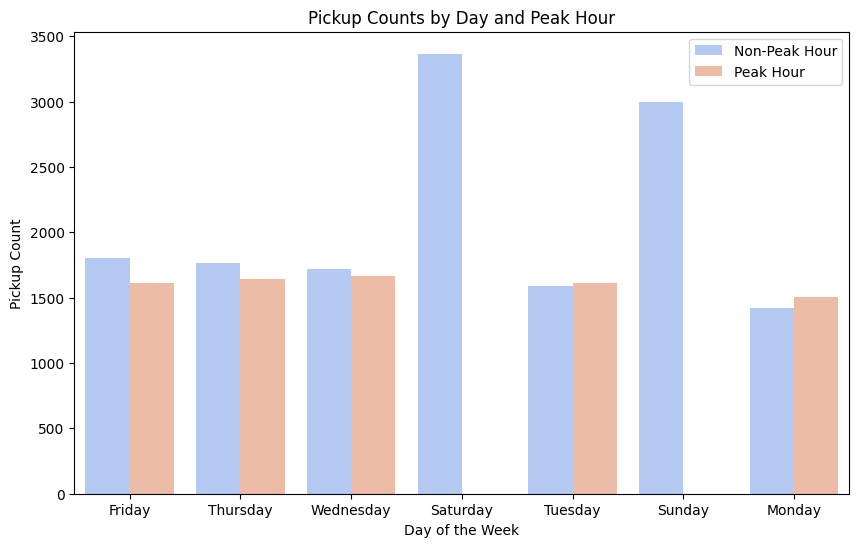

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day', hue='peak_hour', data=data, order=data['day'].value_counts().index, palette='coolwarm')
plt.title('Pickup Counts by Day and Peak Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Pickup Count')
plt.legend(['Non-Peak Hour', 'Peak Hour'], loc='upper right')
plt.show()


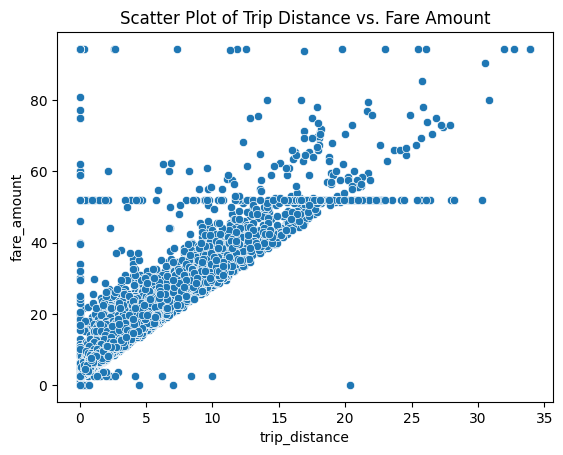

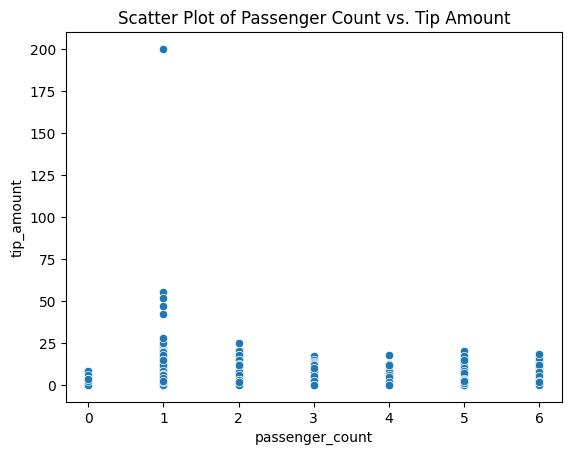

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='trip_distance', y='fare_amount', data=data)
plt.title('Scatter Plot of Trip Distance vs. Fare Amount')
plt.show()

sns.scatterplot(x='passenger_count', y='tip_amount', data=data)
plt.title('Scatter Plot of Passenger Count vs. Tip Amount')
plt.show()

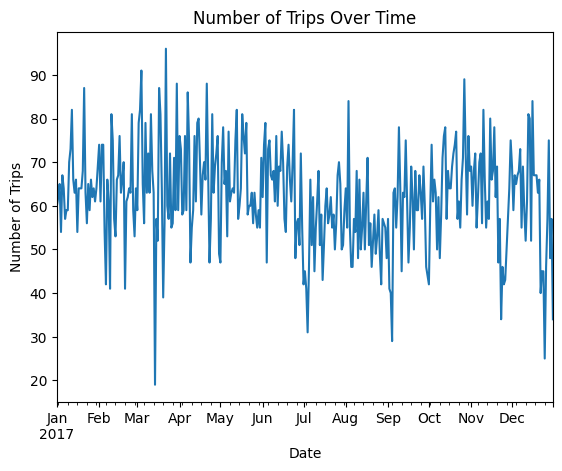

In [89]:
import pandas as pd
import matplotlib.pyplot as plt


data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data.set_index('tpep_pickup_datetime', inplace=True)
data.resample('D').size().plot(title='Number of Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show()

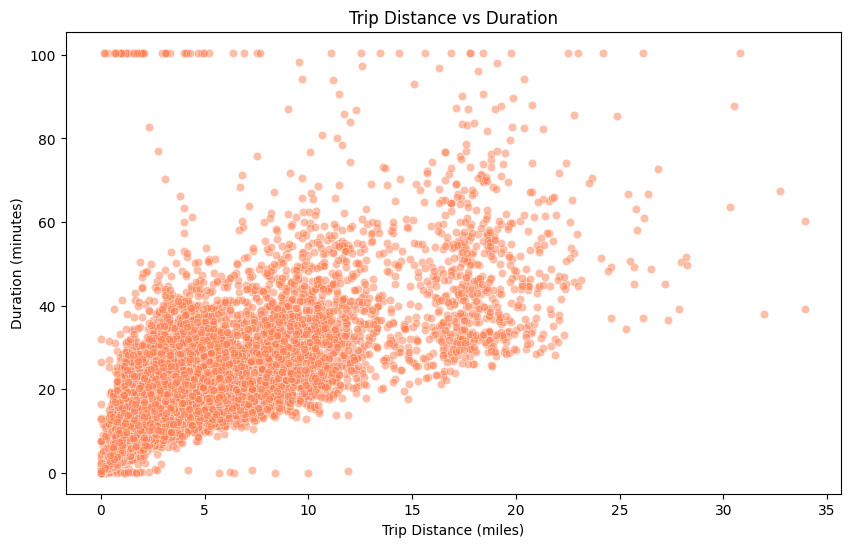

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='duration_mins', data=data, alpha=0.5, color='coral')
plt.title('Trip Distance vs Duration')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Duration (minutes)')
plt.show()

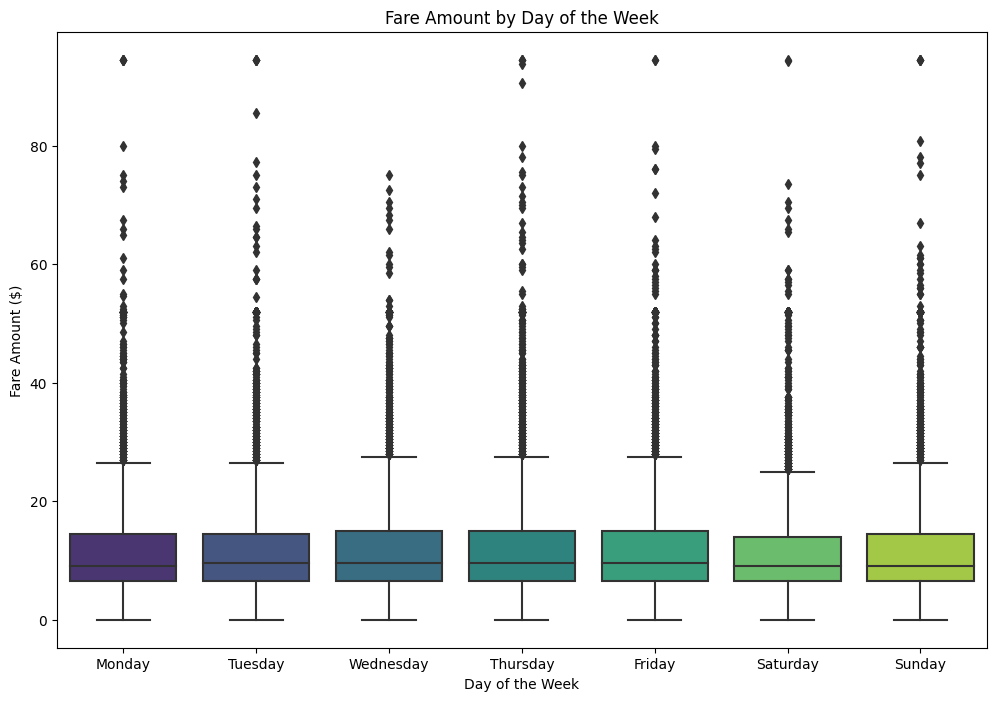

In [93]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='day', y='fare_amount', data=data, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Fare Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Fare Amount ($)')
plt.show()

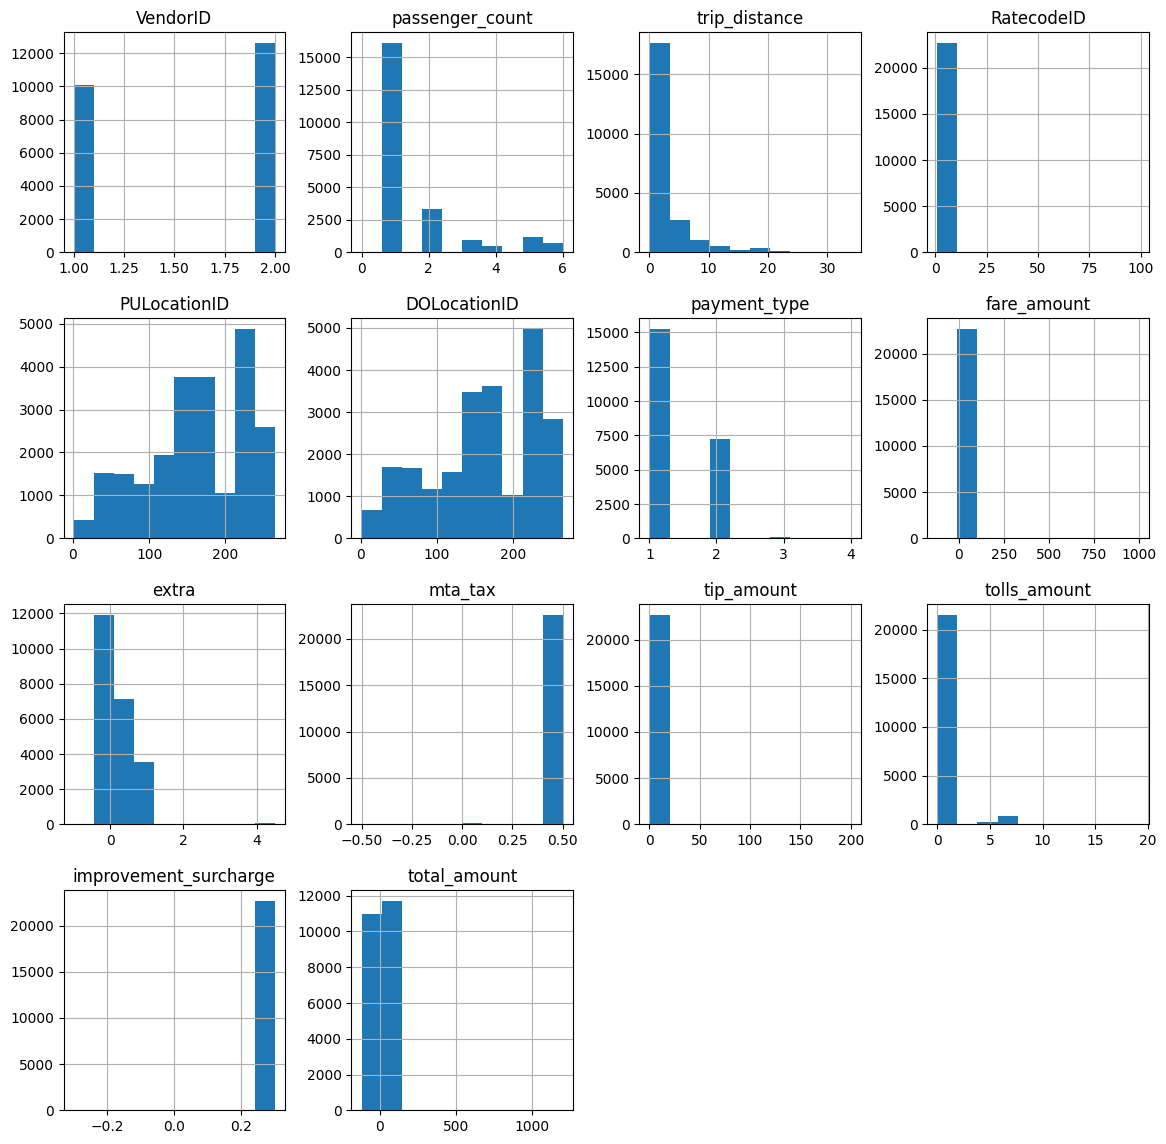

In [94]:
# Selecting numerical columns
num_cols = [
    'VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
    'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
    'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount'
]

#creating histograms
df[num_cols].hist(figsize=(14,14))
plt.show()


# Data Preparation

In [45]:
# Dropping irrelevant columns and extracting the target column and adding it to y
X = data.drop(columns=['Unnamed: 0','extra','mta_tax','tip_amount','tolls_amount',
                       'improvement_surcharge','total_amount','payment_type','RatecodeID','PULocationID','DOLocationID',
                       'store_and_fwd_flag','tpep_pickup_datetime','tpep_dropoff_datetime','day','VendorID'])

y= data['fare_amount']

In [46]:
X.head()

,passenger_count,trip_distance,fare_amount,duration_mins,peak_hour
0,6,3.34,13.0,14.066667,0
1,1,1.80,16.0,26.500000,0
2,1,1.00,6.5,7.200000,1
3,1,3.70,20.5,30.250000,0
4,1,4.37,16.5,16.716667,0


In [47]:
correlation_matrix = X.corr().round(2)
correlation_matrix

,passenger_count,trip_distance,fare_amount,duration_mins,peak_hour
passenger_count,1.00,0.02,0.01,0.02,-0.02
trip_distance,0.02,1.00,0.92,0.75,-0.05
fare_amount,0.01,0.92,1.00,0.81,-0.02
duration_mins,0.02,0.75,0.81,1.00,0.03
peak_hour,-0.02,-0.05,-0.02,0.03,1.00


<Axes: >

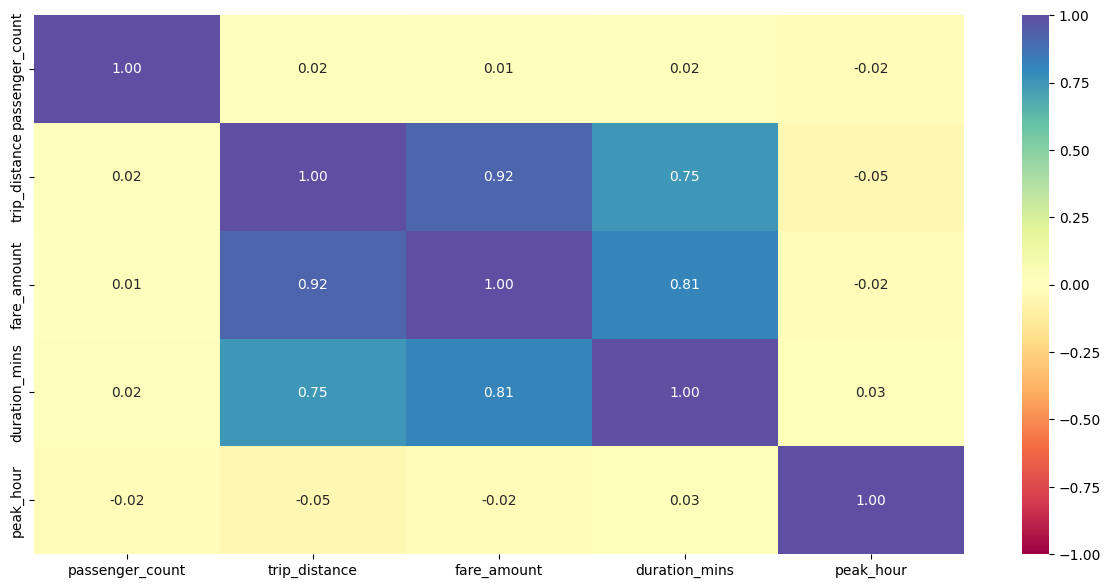

In [48]:
#finding the correlation between various columns of the dataset
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(X.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f",cmap="Spectral")

Target variable fare_amount has high correlation with duration and distance.
distance and duration have a correlation with 0.63

We are aiming to predict fare_amount, so we will create a model with duration
and distance.

# Data Partitioning

In [49]:
# Remove the target column from the features
X = X.drop(columns=['fare_amount'])

X.head()

,passenger_count,trip_distance,duration_mins,peak_hour
0,6,3.34,14.066667,0
1,1,1.80,26.500000,0
2,1,1.00,7.200000,1
3,1,3.70,30.250000,0
4,1,4.37,16.716667,0


In [55]:
#Splitting the dataset into train and test datasets
x_train_unscaled,x_test_unscaled,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [52]:
# Scaling the training set
scaler = StandardScaler().fit(x_train_unscaled)
x_train = scaler.transform(x_train_unscaled)
# print('x_train scaled:', x_train)

# Scaling the test set using the same scaler from the training set
x_test = scaler.transform(x_test_unscaled)
# print('x_test scaled:', x_test)

# Model Building

# Random Forest Model


In [53]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [57]:
rf_model.fit(x_train_unscaled, y_train)


RandomForestRegressor(random_state=42)

In [59]:
y_pred_unscaled = rf_model.predict(x_test_unscaled)


In [60]:
mse_unscaled = mean_squared_error(y_test, y_pred_unscaled)
r2_unscaled = r2_score(y_test, y_pred_unscaled)

print(f'Mean Squared Error (unscaled): {mse_unscaled}')
print(f'R-squared (unscaled): {r2_unscaled}')

Mean Squared Error (unscaled): 10.12025257208482
R-squared (unscaled): 0.9118291626040157


# Performance Evaluation for Random Forest





In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Calculate R-squared score
r2 = r2_score(y_test, y_pred_unscaled)
print(f'R-squared Score: {r2}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_unscaled))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_unscaled)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_unscaled)
print(f'Mean Squared Error (MSE): {mse}')

R-squared Score: 0.9118291626040157
Root Mean Squared Error (RMSE): 3.181234441546995
Mean Absolute Error (MAE): 0.69772386282385
Mean Squared Error (MSE): 10.12025257208482


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Predictions on training data
y_train_pred = rf_model.predict(x_train_unscaled)

# Predictions on testing data
y_test_pred = rf_model.predict(x_test_unscaled)

# Evaluate on training data
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

print("Training Data Scores:")
print(f"R-squared Score: {r2_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")

# Evaluate on testing data
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("\nTesting Data Scores:")
print(f"R-squared Score: {r2_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Mean Squared Error (MSE): {mse_test}")


Training Data Scores:
R-squared Score: 0.9716417465679571
Root Mean Squared Error (RMSE): 1.8332111087574159
Mean Absolute Error (MAE): 0.326812661800047
Mean Squared Error (MSE): 3.3606629692715937

Testing Data Scores:
R-squared Score: 0.9118291626040157
Root Mean Squared Error (RMSE): 3.181234441546995
Mean Absolute Error (MAE): 0.69772386282385
Mean Squared Error (MSE): 10.12025257208482


In [82]:
# Create a DataFrame for actual and predicted values
results_RF = pd.DataFrame(data={'actual': y_test.values,
                             'predicted': y_pred_unscaled.ravel()})

# Calculate the difference
results_RF['difference'] = results_RF['actual'] - results_RF['predicted']
results_RF

,actual,predicted,difference
0,14.0,14.185,-0.185
1,28.0,29.410,-1.410
2,5.5,5.810,-0.310
3,15.5,16.040,-0.540
4,9.5,9.655,-0.155
...,...,...,...
4535,21.5,20.490,1.010
4536,5.5,5.500,0.000
4537,9.0,9.010,-0.010
4538,7.0,6.995,0.005


#Linear Regression Model

In [35]:
model = LinearRegression()

# Fitting the model to training data
model.fit(x_train, y_train)

LinearRegression()

# Performance Evaluation for Linear Regression





In [36]:
# Predicting on the training set
y_pred_train = model.predict(x_train)

# Calculate R^2
r2 = r2_score(y_train, y_pred_train)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Calculate MAE
mae = mean_absolute_error(y_train, y_pred_train)

# Calculate MSE
mse = mean_squared_error(y_train, y_pred_train)

# Display the evaluation metrics
print("R^2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

R^2 Score: 0.8602998097245949
Root Mean Squared Error (RMSE): 4.068845875080655
Mean Absolute Error (MAE): 1.2185861412720322
Mean Squared Error (MSE): 16.55550675516086


In [37]:
# Predicting on the testing set
y_pred_test = model.predict(x_test)

# Calculate R^2
r2 = r2_score(y_test, y_pred_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_test)

# Display the evaluation metrics
print("R^2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

R^2 Score: 0.914843953710913
Root Mean Squared Error (RMSE): 3.126374052636084
Mean Absolute Error (MAE): 1.1256922432698961
Mean Squared Error (MSE): 9.774214716996173


In [74]:
# Predicting on the training set
y_pred_train = model.predict(x_train)

# Calculate R^2
r2 = r2_score(y_train, y_pred_train)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Calculate MAE
mae = mean_absolute_error(y_train, y_pred_train)

# Calculate MSE
mse = mean_squared_error(y_train, y_pred_train)

# Display the evaluation metrics
print("Testing Data Scores:")
print("R^2 Score for training:", r2)
print("Root Mean Squared Error (RMSE) for training:", rmse)
print("Mean Absolute Error (MAE)for training:", mae)
print("Mean Squared Error (MSE)for training:", mse)



# Predicting on the testing set
y_pred_test = model.predict(x_test)

# Calculate R^2
r2 = r2_score(y_test, y_pred_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_test)

# Display the evaluation metrics
print("\nTraining Data Scores:")
print("R^2 Score for testing:", r2)
print("Root Mean Squared Error (RMSE)for testing:", rmse)
print("Mean Absolute Error (MAE) for testing:", mae)
print("Mean Squared Error (MSE)for testing:", mse)

Testing Data Scores:
R^2 Score for training: 0.8602998097245949
Root Mean Squared Error (RMSE) for training: 4.068845875080655
Mean Absolute Error (MAE)for training: 1.2185861412720322
Mean Squared Error (MSE)for training: 16.55550675516086

Training Data Scores:
R^2 Score for testing: 0.914843953710913
Root Mean Squared Error (RMSE)for testing: 3.126374052636084
Mean Absolute Error (MAE) for testing: 1.1256922432698961
Mean Squared Error (MSE)for testing: 9.774214716996173


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(x_train_unscaled, y_train)

# Evaluate Linear Regression on training data
y_pred_train_lr = linear_reg_model.predict(x_train)

# Evaluate Random Forest on training data
y_train_pred_rf = rf_model.predict(x_train_unscaled)

# Evaluate Linear Regression on testing data
y_pred_test_lr = linear_reg_model.predict(x_test)

# Evaluate Random Forest on testing data
y_test_pred_rf = rf_model.predict(x_test_unscaled)

# Print evaluation metrics side by side
print("Linear Regression Metrics (Training Data):")
print("R^2 Score:", r2_score(y_train, y_pred_train_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print("MAE:", mean_absolute_error(y_train, y_pred_train_lr))
print("MSE:", mean_squared_error(y_train, y_pred_train_lr))

print("\nLinear Regression Metrics (Testing Data):")
print("R^2 Score:", r2_score(y_test, y_pred_test_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_test_lr))
print("MSE:", mean_squared_error(y_test, y_pred_test_lr))

print("\nRandom Forest Metrics (Training Data):")
print("R^2 Score:", r2_score(y_train, y_train_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print("MAE:", mean_absolute_error(y_train, y_train_pred_rf))
print("MSE:", mean_squared_error(y_train, y_train_pred_rf))

print("\nRandom Forest Metrics (Testing Data):")
print("R^2 Score:", r2_score(y_test, y_test_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_test_pred_rf))
print("MSE:", mean_squared_error(y_test, y_test_pred_rf))


Linear Regression Metrics (Training Data):
R^2 Score: 0.8602998097245949
RMSE: 4.068845875080655
MAE: 1.2185861412720322
MSE: 16.55550675516086

Linear Regression Metrics (Testing Data):
R^2 Score: 0.914843953710913
RMSE: 3.126374052636084
MAE: 1.1256922432698961
MSE: 9.774214716996173

Random Forest Metrics (Training Data):
R^2 Score: 0.9704744266204992
RMSE: 1.8705611523747527
MAE: 0.33037372886008737
MSE: 3.498999024773563

Random Forest Metrics (Testing Data):
R^2 Score: 0.916328955906791
RMSE: 3.098994369148337
MAE: 0.6882930290736551
MSE: 9.603766100013098


In [38]:
# Create a DataFrame for actual and predicted values for Linear Regression
results = pd.DataFrame(data={'actual': y_test.values,
                             'predicted': y_pred_test.ravel()})

# Calculate the difference
results['difference'] = results['actual'] - results['predicted']
results

,actual,predicted,difference
0,14.0,14.133255,-0.133255
1,28.0,23.357953,4.642047
2,5.5,6.230353,-0.730353
3,15.5,16.611221,-1.111221
4,9.5,10.362304,-0.862304
...,...,...,...
4535,21.5,20.827877,0.672123
4536,5.5,5.849291,-0.349291
4537,9.0,8.736589,0.263411
4538,7.0,6.988222,0.011778


In [84]:
# Create a DataFrame for actual and predicted values for Random forest model
results_RF = pd.DataFrame(data={'actual': y_test.values,
                             'predicted': y_pred_unscaled.ravel()})

# Calculate the difference
results_RF['difference'] = results_RF['actual'] - results_RF['predicted']
results_RF

,actual,predicted,difference
0,14.0,14.185,-0.185
1,28.0,29.410,-1.410
2,5.5,5.810,-0.310
3,15.5,16.040,-0.540
4,9.5,9.655,-0.155
...,...,...,...
4535,21.5,20.490,1.010
4536,5.5,5.500,0.000
4537,9.0,9.010,-0.010
4538,7.0,6.995,0.005


# Model Comparison & Selection

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming you have x_train, x_test, y_train, y_test for both models

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(x_train_unscaled, y_train)

# Evaluate Linear Regression
y_pred_train_lr = linear_reg_model.predict(x_train)
y_pred_test_lr = linear_reg_model.predict(x_test)

# Evaluate Random Forest
y_train_pred_rf = rf_model.predict(x_train_unscaled)
y_test_pred_rf = rf_model.predict(x_test_unscaled)

# Print evaluation metrics side by side
print(f"{'Metric':<25} {'L R (Train)':<20} {'L R (Test)':<20} {'R F (Train)':<20} {'R F  (Test)':<20} ")
print("="*105)

# R-squared Score
print(f"{'R^2 Score':<25} {r2_score(y_train, y_pred_train_lr):<20.4f} {r2_score(y_train, y_train_pred_rf):<20.4f} {r2_score(y_test, y_pred_test_lr):<20.4f} {r2_score(y_test, y_test_pred_rf):<20.4f}")

# Root Mean Squared Error (RMSE)
print(f"{'RMSE':<25} {np.sqrt(mean_squared_error(y_train, y_pred_train_lr)):<20.4f} {np.sqrt(mean_squared_error(y_train, y_train_pred_rf)):<20.4f} {np.sqrt(mean_squared_error(y_test, y_pred_test_lr)):<20.4f} {np.sqrt(mean_squared_error(y_test, y_test_pred_rf)):<20.4f}")

# Mean Absolute Error (MAE)
print(f"{'MAE':<25} {mean_absolute_error(y_train, y_pred_train_lr):<20.4f} {mean_absolute_error(y_train, y_train_pred_rf):<20.4f} {mean_absolute_error(y_test, y_pred_test_lr):<20.4f} {mean_absolute_error(y_test, y_test_pred_rf):<20.4f}")

# Mean Squared Error (MSE)
print(f"{'MSE':<25} {mean_squared_error(y_train, y_pred_train_lr):<20.4f} {mean_squared_error(y_train, y_train_pred_rf):<20.4f} {mean_squared_error(y_test, y_pred_test_lr):<20.4f} {mean_squared_error(y_test, y_test_pred_rf):<20.4f}")


Metric                    L R (Train)          L R (Test)           R F (Train)          R F  (Test)          
R^2 Score                 0.8603               0.9711               0.9148               0.9083              
RMSE                      4.0688               1.8499               3.1264               3.2435              
MAE                       1.2186               0.3285               1.1257               0.7014              
MSE                       16.5555              3.4222               9.7742               10.5203             


The Linear Regression model appears to be the better-performing model. It has lower errors, higher R-squared on training data, and competitive performance on testing data when compared to the Random Forest Model.